# Data Analysis
## Class 21
### November 22th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flightsFeb.csv')
df

YEAR  MONTH  DAY_OF_MONTH OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  \
0       2015      2            11         OO   N702SK               4968   
1       2015      2             7         OO   N745SK               4968   
2       2015      2            24         OO   N702SK               4968   
3       2015      2            27         OO   N705SK               4968   
4       2015      2            17         OO   N727SK               4968   
...      ...    ...           ...        ...      ...                ...   
429186  2015      2            12         EV   N12567               4735   
429187  2015      2            10         EV   N18557               4735   
429188  2015      2            22         EV   N11140               4735   
429189  2015      2            19         EV   N16999               4735   
429190  2015      2            18         EV   N15973               4735   

       ORIGIN DEST  CRS_DEP_TIME  DEP_TIME  ...  ARR_TIME  ARR_DELAY  \
0         IAH  ASE           900     857.0  ...    1056.0        4.0   
1         IAH  BZN          1056    1051.0  ...    1340.0       16.0   
2         IAH  CLT          1250    1506.0  ...    1811.0      124.0   
3         IAH  CMH          1250    1254.0  ...    1617.0        0.0   
4         IAH  CMH          1250    1258.0  ...    1621.0        4.0   
...       ...  ...           ...       ...  ...       ...        ...   
429186    CLE  MKE           623     614.0  ...     723.0       29.0   
429187    CLE  MKE           613     602.0  ...     654.0       10.0   
429188    CLE  MKE          1641    1632.0  ...    1658.0       -8.0   
429189    CLE  MKE           623     618.0  ...     655.0        1.0   
429190    CLE  MKE           622     617.0  ...     656.0        3.0   

        CANCELLED  CANCELLATION_CODE  DIVERTED  CRS_ELAPSED_TIME  \
0             0.0                NaN       0.0             172.0   
1             0.0                NaN       0.0             208.0   
2             0.0                NaN       0.0             137.0   
3             0.0                NaN       0.0             147.0   
4             0.0                NaN       0.0             147.0   
...           ...                ...       ...               ...   
429186        0.0                NaN       0.0              91.0   
429187        0.0                NaN       0.0              91.0   
429188        0.0                NaN       0.0              85.0   
429189        0.0                NaN       0.0              91.0   
429190        0.0                NaN       0.0              91.0   

        ACTUAL_ELAPSED_TIME AIR_TIME  DISTANCE  Unnamed: 23  
0                     179.0    136.0     913.0          NaN  
1                     229.0    205.0    1385.0          NaN  
2                     125.0    109.0     912.0          NaN  
3                     143.0    114.0     986.0          NaN  
4                     143.0    110.0     986.0          NaN  
...                     ...      ...       ...          ...  
429186                129.0     74.0     328.0          NaN  
429187                112.0     80.0     328.0          NaN  
429188                 86.0     63.0     328.0          NaN  
429189                 97.0     61.0     328.0          NaN  
429190                 99.0     62.0     328.0          NaN  

[429191 rows x 24 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429191 entries, 0 to 429190
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 429191 non-null  int64  
 1   MONTH                429191 non-null  int64  
 2   DAY_OF_MONTH         429191 non-null  int64  
 3   OP_CARRIER           429191 non-null  object 
 4   TAIL_NUM             425597 non-null  object 
 5   OP_CARRIER_FL_NUM    429191 non-null  int64  
 6   ORIGIN               429191 non-null  object 
 7   DEST                 429191 non-null  object 
 8   CRS_DEP_TIME         429191 non-null  int64  
 9   DEP_TIME             409132 non-null  float64
 10  DEP_DELAY            409132 non-null  float64
 11  TAXI_OUT             408779 non-null  float64
 12  TAXI_IN              408369 non-null  float64
 13  CRS_ARR_TIME         429191 non-null  int64  
 14  ARR_TIME             408369 non-null  float64
 15  ARR_DELAY        

* Explorar la base de datos y determinar numero de datos faltantes, causas, etc.
* Determinar si se eliminan los datos faltantes o se reemplazan y explicar porque
* Exploración visual, histogramas de las columnas, graficas de dispersion generadas de manera inteligente

Vamos a cambiarle el nombre a las columnas para que sea mas facil trabajarlas

In [4]:
df = df.set_axis(df.columns.str.capitalize(), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429191 entries, 0 to 429190
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Year                 429191 non-null  int64  
 1   Month                429191 non-null  int64  
 2   Day_of_month         429191 non-null  int64  
 3   Op_carrier           429191 non-null  object 
 4   Tail_num             425597 non-null  object 
 5   Op_carrier_fl_num    429191 non-null  int64  
 6   Origin               429191 non-null  object 
 7   Dest                 429191 non-null  object 
 8   Crs_dep_time         429191 non-null  int64  
 9   Dep_time             409132 non-null  float64
 10  Dep_delay            409132 non-null  float64
 11  Taxi_out             408779 non-null  float64
 12  Taxi_in              408369 non-null  float64
 13  Crs_arr_time         429191 non-null  int64  
 14  Arr_time             408369 non-null  float64
 15  Arr_delay        

Vamos a ver si hay valores faltantes

In [5]:
df.isnull().sum()/len(df)*100

Year                     0.000000
Month                    0.000000
Day_of_month             0.000000
Op_carrier               0.000000
Tail_num                 0.837389
Op_carrier_fl_num        0.000000
Origin                   0.000000
Dest                     0.000000
Crs_dep_time             0.000000
Dep_time                 4.673677
Dep_delay                4.673677
Taxi_out                 4.755925
Taxi_in                  4.851453
Crs_arr_time             0.000000
Arr_time                 4.851453
Arr_delay                5.015949
Cancelled                0.000000
Cancellation_code       95.219611
Diverted                 0.000000
Crs_elapsed_time         0.000466
Actual_elapsed_time      5.015949
Air_time                 5.015949
Distance                 0.000000
Unnamed: 23            100.000000
dtype: float64

Como 'unnamed: 23' falta el 100% lo vamos a eliminar

In [6]:
df = df.drop(columns=['Unnamed: 23'])

In [7]:
df.isnull().sum()/len(df)*100

Year                    0.000000
Month                   0.000000
Day_of_month            0.000000
Op_carrier              0.000000
Tail_num                0.837389
Op_carrier_fl_num       0.000000
Origin                  0.000000
Dest                    0.000000
Crs_dep_time            0.000000
Dep_time                4.673677
Dep_delay               4.673677
Taxi_out                4.755925
Taxi_in                 4.851453
Crs_arr_time            0.000000
Arr_time                4.851453
Arr_delay               5.015949
Cancelled               0.000000
Cancellation_code      95.219611
Diverted                0.000000
Crs_elapsed_time        0.000466
Actual_elapsed_time     5.015949
Air_time                5.015949
Distance                0.000000
dtype: float64

Veamos porque falta el 95% de CANCELLATION_CODE

In [8]:
df['Cancellation_code'].isna().sum()

408674

In [9]:
df[df['Cancellation_code'].isna()].Cancelled.value_counts()

0.0    408674
Name: Cancelled, dtype: int64

In [10]:
df.Cancelled.value_counts()

0.0    408674
1.0     20517
Name: Cancelled, dtype: int64

Todos los valores que faltan en la columna 'CANCELLATION_CODE' es porque no fueron cancelados

In [11]:
df.Cancellation_code.value_counts()

B    15447
A     2815
C     2254
D        1
Name: Cancellation_code, dtype: int64

Vamos a rellenarlo con un 'NO CANCELADO' para que no marque valores faltantes esa columna

In [12]:
df.Cancellation_code.fillna('No cancelado', inplace=True)

In [13]:
df.isnull().sum()/len(df)*100

Year                   0.000000
Month                  0.000000
Day_of_month           0.000000
Op_carrier             0.000000
Tail_num               0.837389
Op_carrier_fl_num      0.000000
Origin                 0.000000
Dest                   0.000000
Crs_dep_time           0.000000
Dep_time               4.673677
Dep_delay              4.673677
Taxi_out               4.755925
Taxi_in                4.851453
Crs_arr_time           0.000000
Arr_time               4.851453
Arr_delay              5.015949
Cancelled              0.000000
Cancellation_code      0.000000
Diverted               0.000000
Crs_elapsed_time       0.000466
Actual_elapsed_time    5.015949
Air_time               5.015949
Distance               0.000000
dtype: float64

In [14]:
arr_delay_isna = df[df.Arr_delay.isna()].index
arr_delay_isna

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=21528)

In [15]:
act_ela_ti_isna = df[df.Actual_elapsed_time.isna()].index
act_ela_ti_isna

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=21528)

In [16]:
(arr_delay_isna == act_ela_ti_isna).sum()

21528

In [17]:
air_ti_isna = df[df.Air_time.isna()].index
air_ti_isna

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=21528)

In [18]:
(arr_delay_isna == air_ti_isna).sum()

21528

In [19]:
ind_cancelled = df.groupby('Cancelled').get_group(1).index
ind_cancelled

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=20517)

In [20]:
arr_delay_isna.isin(ind_cancelled).sum()

20517

Los valores faltantes en las columnas ARR_DELAY, ACTUAL_ELAPSED_TIME y AIR_TIME son en los mismos renglones y la mayoria son porque los vuelos fueron cancelados

Faltantes en ARR_DELAY, ACTUAL_ELAPSED_TIME y AIR_TIME que no fueron cancelados

In [21]:
df.iloc[arr_delay_isna].groupby('Cancelled').get_group(0)

Year  Month  Day_of_month Op_carrier Tail_num  Op_carrier_fl_num  \
736     2015      2            20         US   N564UW                639   
950     2015      2            20         US   N947UW               1701   
1499    2015      2            22         US   N958UW               2145   
1737    2015      2            23         US   N663AW                581   
2227    2015      2            23         US   N587UW               1841   
...      ...    ...           ...        ...      ...                ...   
428031  2015      2            17         EV   N16546               4106   
428392  2015      2            14         EV   N11536               4120   
428479  2015      2            22         EV   N14991               4123   
428547  2015      2            14         EV   N16559               4126   
428695  2015      2            19         EV   N12142               4133   

       Origin Dest  Crs_dep_time  Dep_time  ...  Crs_arr_time  Arr_time  \
736       JFK  PHX          1620    1614.0  ...          2004    2202.0   
950       BOS  PHL           830     919.0  ...          1007    1442.0   
1499      DCA  LGA          1600    1751.0  ...          1723    2240.0   
1737      PHL  SAN           730     730.0  ...          1035    1228.0   
2227      DEN  CLT           815     821.0  ...          1327    1547.0   
...       ...  ...           ...       ...  ...           ...       ...   
428031    CHS  IAH           630     646.0  ...           829     945.0   
428392    LGA  CLE           947     947.0  ...          1146    1615.0   
428479    TYS  IAH           630     631.0  ...           811    1004.0   
428547    BOS  CLE          1019    1015.0  ...          1234    1608.0   
428695    EWR  PWM          1659    1655.0  ...          1814    2015.0   

        Arr_delay  Cancelled  Cancellation_code  Diverted  Crs_elapsed_time  \
736           NaN        0.0       No cancelado       1.0             344.0   
950           NaN        0.0       No cancelado       1.0              97.0   
1499          NaN        0.0       No cancelado       1.0              83.0   
1737          NaN        0.0       No cancelado       1.0             365.0   
2227          NaN        0.0       No cancelado       1.0             192.0   
...           ...        ...                ...       ...               ...   
428031        NaN        0.0       No cancelado       1.0             179.0   
428392        NaN        0.0       No cancelado       1.0             119.0   
428479        NaN        0.0       No cancelado       1.0             161.0   
428547        NaN        0.0       No cancelado       1.0             135.0   
428695        NaN        0.0       No cancelado       1.0              75.0   

       Actual_elapsed_time  Air_time  Distance  
736                    NaN       NaN    2153.0  
950                    NaN       NaN     280.0  
1499                   NaN       NaN     214.0  
1737                   NaN       NaN    2370.0  
2227                   NaN       NaN    1337.0  
...                    ...       ...       ...  
428031                 NaN       NaN     925.0  
428392                 NaN       NaN     419.0  
428479                 NaN       NaN     771.0  
428547                 NaN       NaN     563.0  
428695                 NaN       NaN     284.0  

[1011 rows x 23 columns]

In [22]:
1011/len(df)*100

0.23555945954132307

Posiblemente se podrian eliminar estos ya que solo son 0.23% de los datos

In [23]:
df[df['Arr_time'].isna()].Cancelled.value_counts()

1.0    20517
0.0      305
Name: Cancelled, dtype: int64

In [24]:
df[df['Taxi_in'].isna()].Cancelled.value_counts()

1.0    20517
0.0      305
Name: Cancelled, dtype: int64

In [25]:
arr_time_na = df[df['Arr_time'].isna()].index
arr_time_na 

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=20822)

In [26]:
taxi_in_na = df[df['Taxi_in'].isna()].index
taxi_in_na 

Int64Index([    31,     57,     66,    201,    202,    245,    369,    397,
               412,    423,
            ...
            429071, 429077, 429081, 429087, 429097, 429115, 429134, 429144,
            429175, 429184],
           dtype='int64', length=20822)

In [27]:
(arr_time_na == taxi_in_na).sum()

20822

Todos los valores faltantes en ARR_TIME y TAXI_IN son en los mismos renglones y la mayoria son en vuelos cancelados

In [28]:
305/len(df)*100

0.07106393190910341

Se podrian eliminar los no cancelados ya que solo son el 0.07%

In [29]:
df[df['Dep_time'].isna()].Cancelled.value_counts()

1.0    20059
Name: Cancelled, dtype: int64

In [30]:
df[df['Dep_delay'].isna()].Cancelled.value_counts()

1.0    20059
Name: Cancelled, dtype: int64

Todos los valores faltantes en DEP_TIME y DEP.DELAY son por vuelos cancelados

In [31]:
df[df['Taxi_out'].isna()].Cancelled.value_counts()

1.0    20412
Name: Cancelled, dtype: int64

Todos los valores faltantes en TAXI_OUT son por vuelos cancelados

Exploremos los datos graficas

<AxesSubplot: xlabel='Day_of_month', ylabel='Count'>

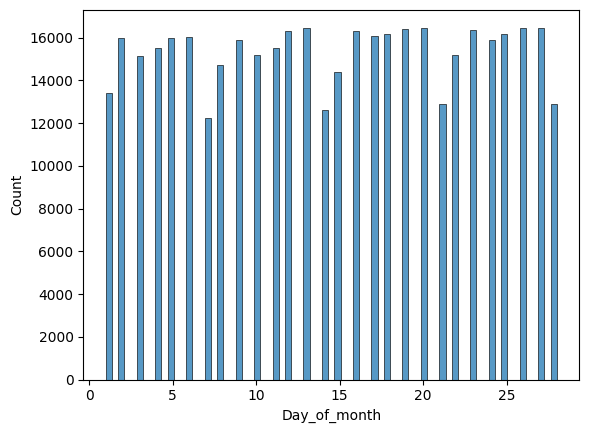

In [32]:
sns.histplot(df['Day_of_month'])

<AxesSubplot: xlabel='Day_of_month', ylabel='Count'>

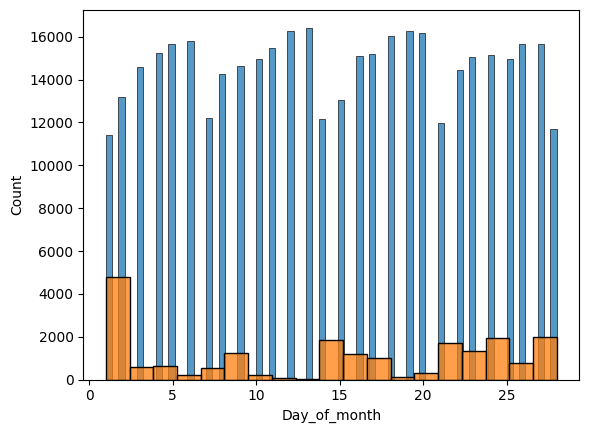

In [33]:
sns.histplot(df.groupby('Cancelled').get_group(0)['Day_of_month'])
sns.histplot(df.groupby('Cancelled').get_group(1)['Day_of_month'])

<AxesSubplot: xlabel='Op_carrier', ylabel='Count'>

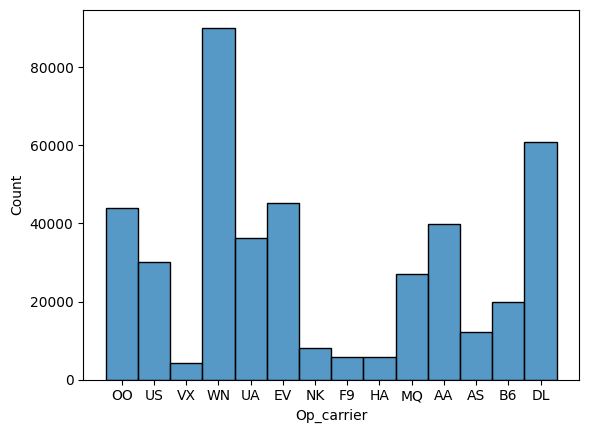

In [34]:
sns.histplot(df['Op_carrier'])

<AxesSubplot: xlabel='Op_carrier', ylabel='Count'>

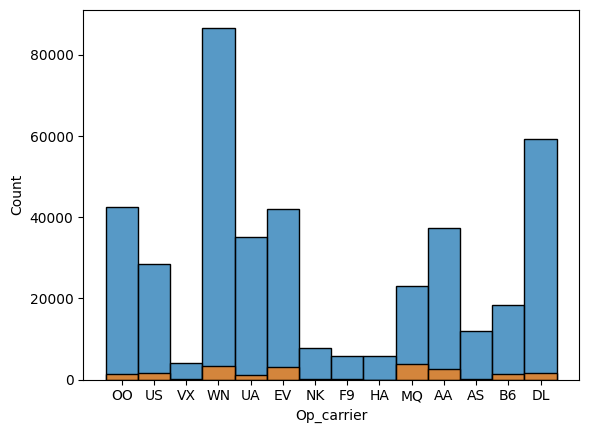

In [35]:
sns.histplot(df.groupby('Cancelled').get_group(0)['Op_carrier'])
sns.histplot(df.groupby('Cancelled').get_group(1)['Op_carrier'])

In [36]:
df['Tail_num'].value_counts()

N486HA    354
N489HA    348
N477HA    347
N488HA    336
N476HA    323
         ... 
N223UA      1
N79011      1
N225UA      1
N660UA      1
N7BDAA      1
Name: Tail_num, Length: 4361, dtype: int64

In [37]:
df['Op_carrier_fl_num'].value_counts()

469     366
345     334
61      321
745     312
711     307
       ... 
5446      1
6094      1
6354      1
6128      1
5893      1
Name: Op_carrier_fl_num, Length: 6272, dtype: int64

<AxesSubplot: xlabel='Origin', ylabel='Count'>

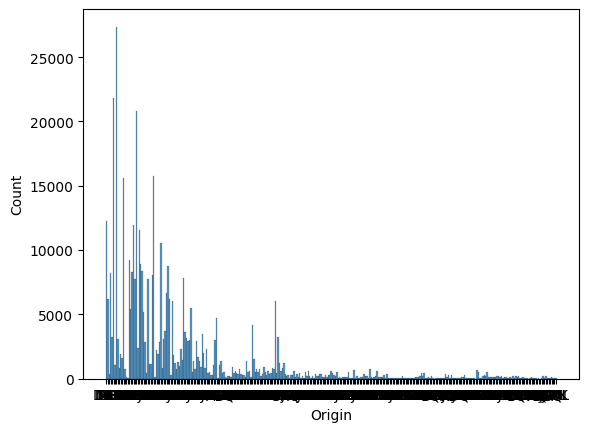

In [38]:
sns.histplot(df['Origin'])

<AxesSubplot: xlabel='Origin', ylabel='Count'>

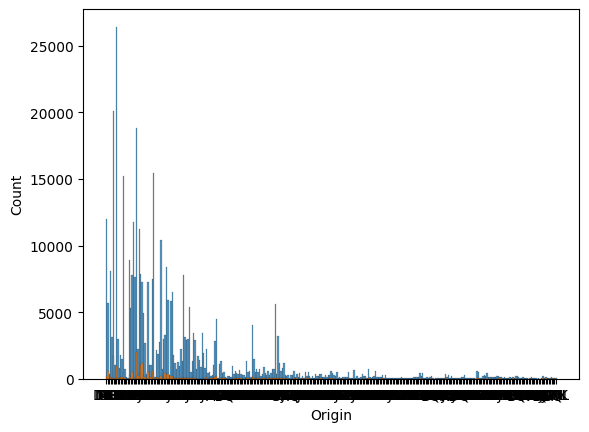

In [39]:
sns.histplot(df.groupby('Cancelled').get_group(0)['Origin'])
sns.histplot(df.groupby('Cancelled').get_group(1)['Origin'])

<AxesSubplot: xlabel='Dest', ylabel='Count'>

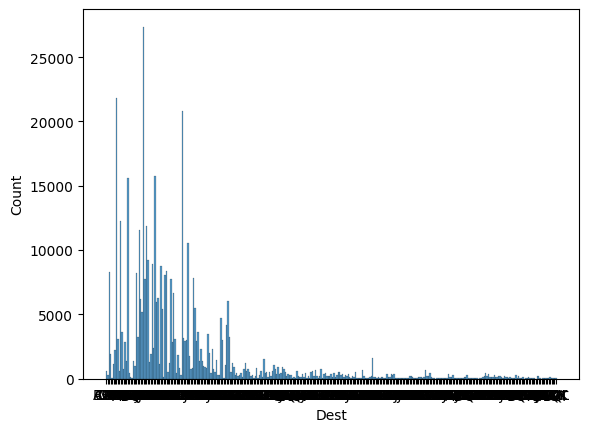

In [40]:
sns.histplot(df['Dest'])

<AxesSubplot: xlabel='Dest', ylabel='Count'>

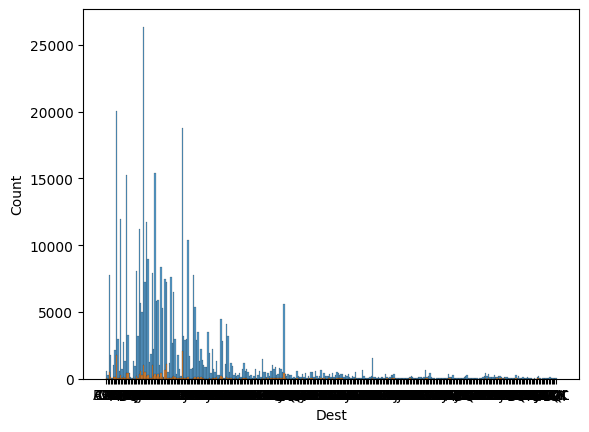

In [41]:
sns.histplot(df.groupby('Cancelled').get_group(0)['Dest'])
sns.histplot(df.groupby('Cancelled').get_group(1)['Dest'])

In [42]:
df.iloc[:,8:]

Crs_dep_time  Dep_time  Dep_delay  Taxi_out  Taxi_in  Crs_arr_time  \
0                900     857.0       -3.0      40.0      3.0          1052   
1               1056    1051.0       -5.0      19.0      5.0          1324   
2               1250    1506.0      136.0      11.0      5.0          1607   
3               1250    1254.0        4.0      22.0      7.0          1617   
4               1250    1258.0        8.0      22.0     11.0          1617   
...              ...       ...        ...       ...      ...           ...   
429186           623     614.0       -9.0      37.0     18.0           654   
429187           613     602.0      -11.0      25.0      7.0           644   
429188          1641    1632.0       -9.0      20.0      3.0          1706   
429189           623     618.0       -5.0      27.0      9.0           654   
429190           622     617.0       -5.0      31.0      6.0           653   

        Arr_time  Arr_delay  Cancelled Cancellation_code  Diverted  \
0         1056.0        4.0        0.0      No cancelado       0.0   
1         1340.0       16.0        0.0      No cancelado       0.0   
2         1811.0      124.0        0.0      No cancelado       0.0   
3         1617.0        0.0        0.0      No cancelado       0.0   
4         1621.0        4.0        0.0      No cancelado       0.0   
...          ...        ...        ...               ...       ...   
429186     723.0       29.0        0.0      No cancelado       0.0   
429187     654.0       10.0        0.0      No cancelado       0.0   
429188    1658.0       -8.0        0.0      No cancelado       0.0   
429189     655.0        1.0        0.0      No cancelado       0.0   
429190     656.0        3.0        0.0      No cancelado       0.0   

        Crs_elapsed_time  Actual_elapsed_time  Air_time  Distance  
0                  172.0                179.0     136.0     913.0  
1                  208.0                229.0     205.0    1385.0  
2                  137.0                125.0     109.0     912.0  
3                  147.0                143.0     114.0     986.0  
4                  147.0                143.0     110.0     986.0  
...                  ...                  ...       ...       ...  
429186              91.0                129.0      74.0     328.0  
429187              91.0                112.0      80.0     328.0  
429188              85.0                 86.0      63.0     328.0  
429189              91.0                 97.0      61.0     328.0  
429190              91.0                 99.0      62.0     328.0  

[429191 rows x 15 columns]

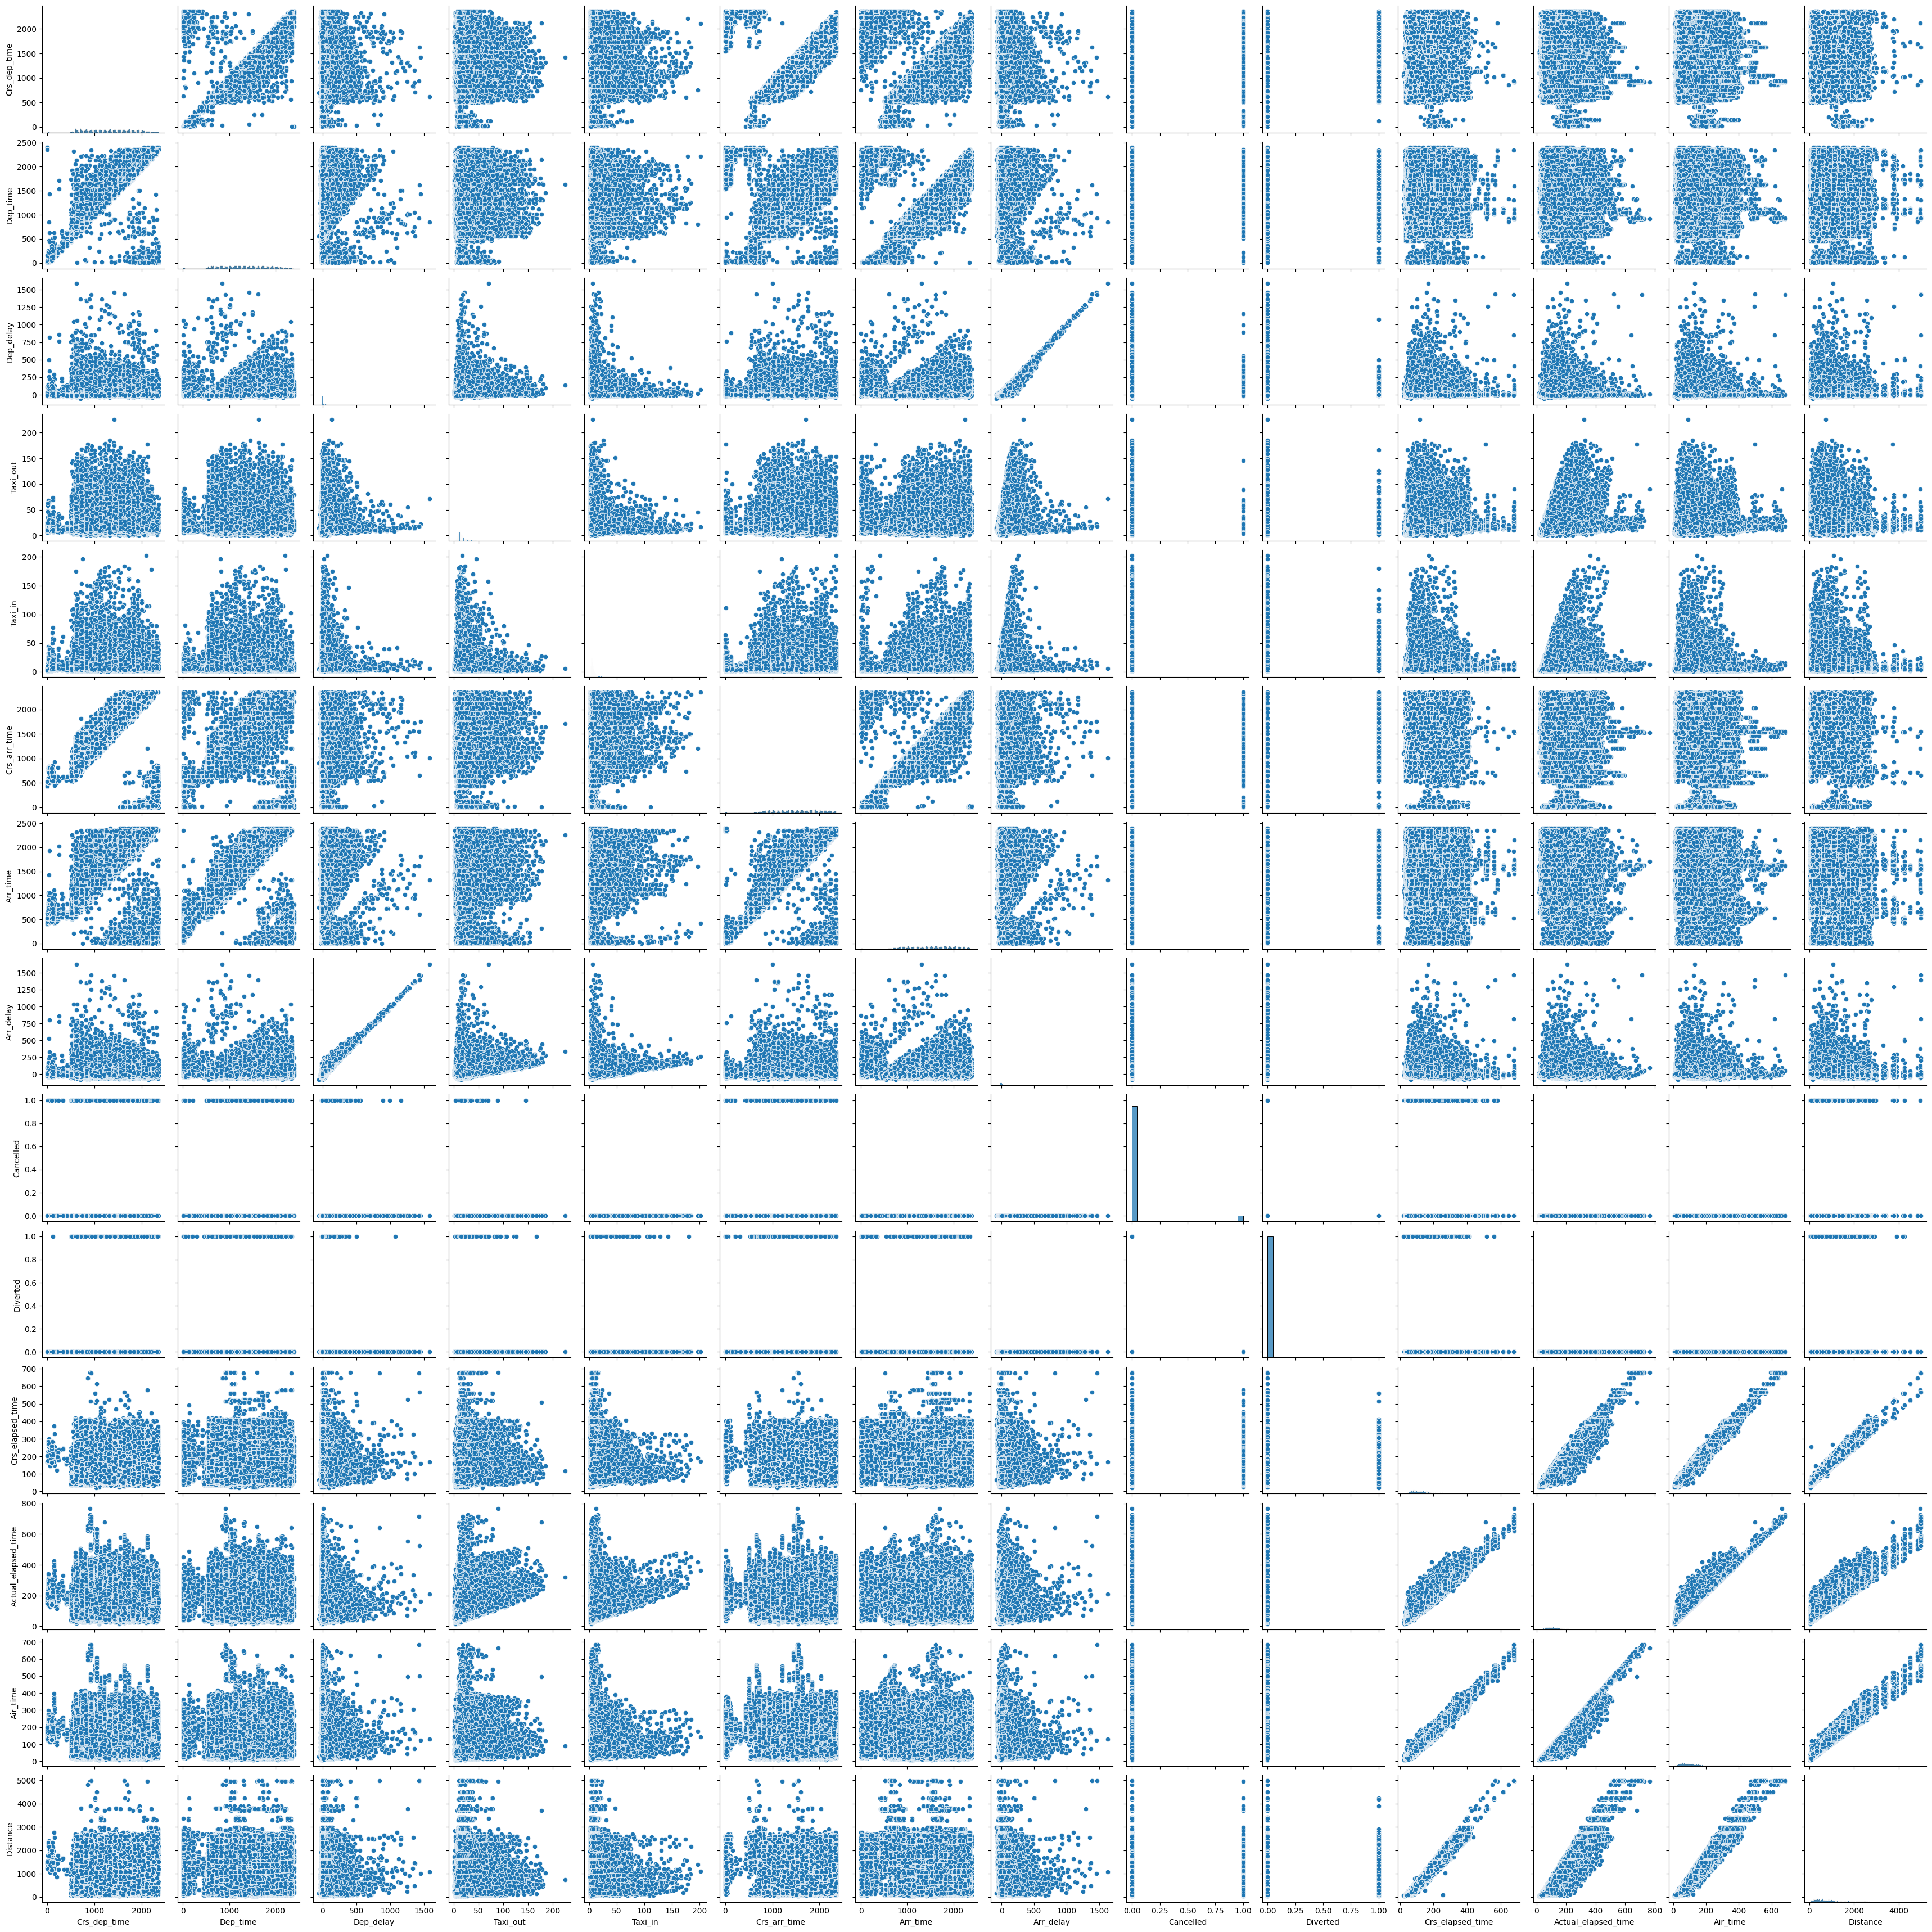

In [43]:
sns.pairplot(df.iloc[:,8:])

Se ve que hay correlación entre 
* ARR_DELAY y DEP_DELAY
* ACTUAL_ELAPSED_TIME
* CRS_ELAPSED_TIME
* AIR_TIME
* DISTANCE

<AxesSubplot: xlabel='Arr_delay', ylabel='Dep_delay'>

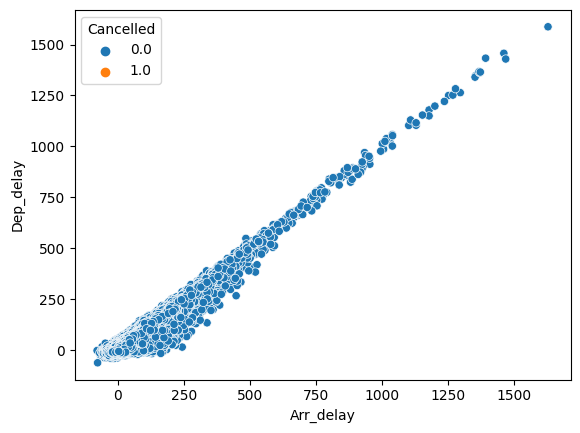

In [44]:
sns.scatterplot(data=df, x='Arr_delay', y='Dep_delay', hue='Cancelled')

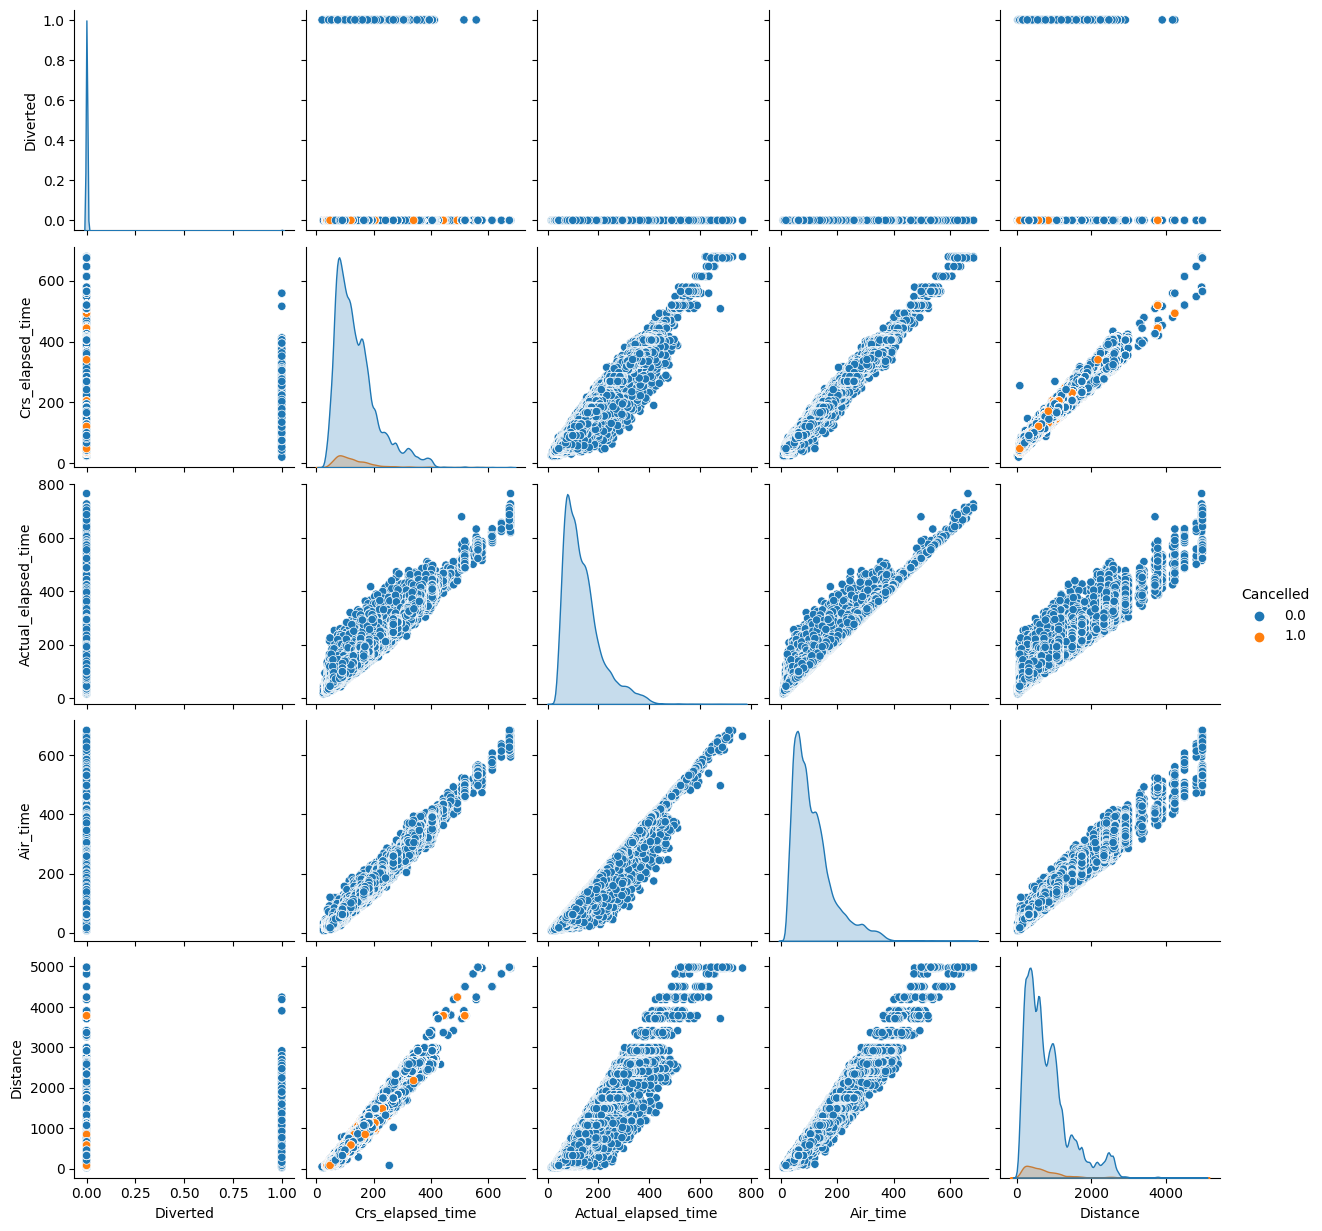

In [51]:
sns.pairplot(df.iloc[:,16:], hue='Cancelled')